In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


4 Layer CNN

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.utils import to_categorical

In [32]:
import tensorflow.keras.backend as K

In [33]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pickle
import random

In [34]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version

In [35]:
!unzip "/content/drive/MyDrive/Dataset/Apple/data-20230226T174019Z-001.zip" -d "/content/"


Archive:  /content/drive/MyDrive/Dataset/Apple/data-20230226T174019Z-001.zip
replace /content/data/test/Apple___Cedar_apple_rust/5ba35826-8831-4638-a443-5c28f80c4de8___FREC_C.Rust 0212.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [36]:
import shutil
rootdir= '/content/data' #path of the original folder
classes = ['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy']
for i in classes:
  # os.makedirs(rootdir +'/train/' + i)
  # os.makedirs(rootdir +'/test/' + i)
  source = rootdir + '/' + i
  allFileNames = os.listdir(source)
  np.random.shuffle(allFileNames)
  test_ratio = 0.25
  train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - test_ratio))])
  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

  for name in train_FileNames:
    shutil.copy(name, rootdir +'/train/' + i)

  for name in test_FileNames:
    shutil.copy(name, rootdir +'/test/' + i)

In [37]:
dirtrain='/content/data/train'

In [38]:
dirtest='/content/data/test'

In [39]:
categories=['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy']

(256, 256, 3)


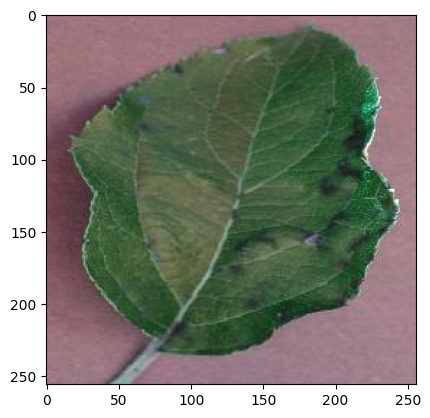

In [40]:
for c in categories:
    path=os.path.join(dirtrain,c)
    for i in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,i))
        print(img_array.shape)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [41]:
training_data = []
def create_training_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtrain,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                #img_array=cv2.resize(img_array,(128,128))
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_train=create_training_data()

In [42]:
testing_data = []
def create_testing_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtest,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                #img_array=cv2.resize(img_array,(128,128))
                testing_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_test=create_testing_data()

In [43]:
print(len(training_data))
print(count_train)
print(len(testing_data))
print(count_test)

3129
[625, 609, 269, 1626]
1856
[379, 355, 158, 964]


In [44]:
random.shuffle(training_data)
random.shuffle(testing_data)

In [45]:
x_train = []
y_train = []
x_test = []
y_test = []

In [46]:
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
'''for features,label in testing_data:
    x_train.append(features)
    y_train.append(label)'''
x_train=np.array(x_train).reshape(-1,256,256,3)

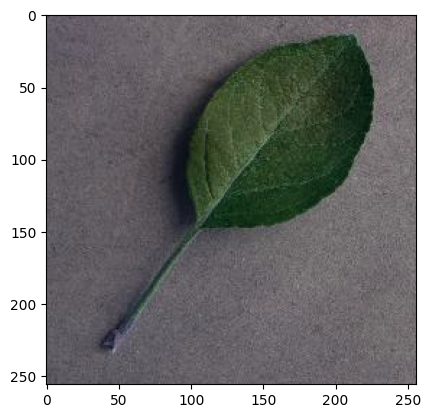

In [47]:
x=cv2.resize(training_data[0][0],(256,256))
plt.imshow(x,cmap='gray')

In [48]:
for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)
x_test=np.array(x_test).reshape(-1,256,256,3)

In [49]:
def save_training_data(x_train,y_train):
    pickle_out=open("x_train_coloured.pickle","wb")
    pickle.dump(x_train,pickle_out)
    pickle_out.close()

    pickle_out=open("y_train_coloured.pickle","wb")
    pickle.dump(y_train,pickle_out)
    pickle_out.close
save_training_data(x_train,y_train)

In [50]:
def save_testing_data(x_test,y_test):
    pickle_out=open("x_test_coloured.pickle","wb")
    pickle.dump(x_test,pickle_out)
    pickle_out.close()

    pickle_out=open("y_test_coloured.pickle","wb")
    pickle.dump(y_test,pickle_out)
    pickle_out.close()
save_testing_data(x_test,y_test)

In [51]:
def load_data():
    pickle_in=open("x_train_coloured.pickle","rb")
    x_train=pickle.load(pickle_in)
    return x_train

In [52]:
x_train.shape

(3129, 256, 256, 3)

In [53]:
K.clear_session()
model=Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))


model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))

model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(Activation('relu'))

model.add(Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                    

In [55]:
len(model.layers)

10

In [56]:
y_train_cat=to_categorical(y_train,4)


In [57]:
y_test_cat=to_categorical(y_test,4)

In [58]:
model.fit(x_train,y_train_cat,batch_size=32,
          epochs=10,verbose=1,validation_split=0.15,shuffle=True)
# testing loss and accuracy

Epoch 1/10
84/84 [==============================] - 9s 93ms/step - loss: 2.4529 - accuracy: 0.4866 - val_loss: 1.1292 - val_accuracy: 0.5277
Epoch 2/10
84/84 [==============================] - 6s 68ms/step - loss: 0.9574 - accuracy: 0.6461 - val_loss: 2.1243 - val_accuracy: 0.4872
Epoch 3/10
84/84 [==============================] - 6s 70ms/step - loss: 0.6996 - accuracy: 0.7465 - val_loss: 2.9459 - val_accuracy: 0.2511
Epoch 4/10
84/84 [==============================] - 6s 70ms/step - loss: 0.5443 - accuracy: 0.7988 - val_loss: 1.4915 - val_accuracy: 0.5660
Epoch 5/10
84/84 [==============================] - 6s 70ms/step - loss: 0.4541 - accuracy: 0.8387 - val_loss: 0.3469 - val_accuracy: 0.8809
Epoch 6/10
84/84 [==============================] - 6s 71ms/step - loss: 0.3825 - accuracy: 0.8575 - val_loss: 0.3979 - val_accuracy: 0.8660
Epoch 7/10
84/84 [==============================] - 6s 71ms/step - loss: 0.3466 - accuracy: 0.8729 - val_loss: 0.4428 - val_accuracy: 0.8170
Epoch 8/10
84

In [60]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Test set metrics
test_pred = model.predict(x_test)
test_pred = np.argmax(test_pred, axis=1)

test_precision = precision_score(y_test, test_pred, average='macro')
test_recall = recall_score(y_test, test_pred, average='macro')
test_f1_score = f1_score(y_test, test_pred, average='macro')

print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)


58/58 [==============================] - 1s 18ms/step
Test Precision: 0.9502322447797507
Test Recall: 0.9224174947829674
Test F1 Score: 0.9349284685175296


58/58 [==============================] - 1s 19ms/step


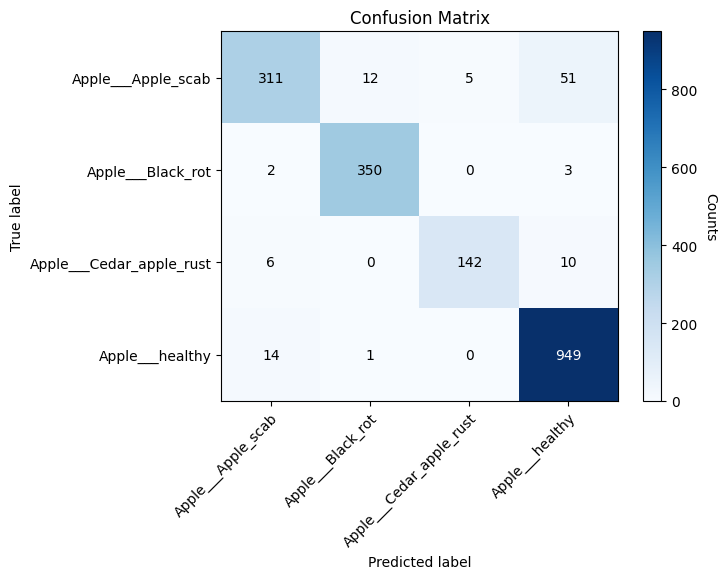

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtain predictions for the test set
test_pred = model.predict(x_test)
test_pred = np.argmax(test_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Create figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Counts', rotation=-90, va="bottom")

# Set axis labels and title
class_names = ['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy']  # Replace with your class names
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label', ylabel='True label',
       title='Confusion Matrix',
       aspect='auto')

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

# Show the plot
plt.show()
